## Configs

In [1]:
import pandas as pd
import math
import numpy as np

## Read excel data into pandas dataframes

Note: Jan 1-Feb 26 2019 does not include flex question fields. I manually appended Jan 1 - Feb 26 to Feb-Jun 2019 excel file and manually appended Feb 23-Apr 14 to the Jan 1-Feb 22 excel file (note the Feb to Apr file includes Feb 22 as well, had to make sure to exclude that so I didn't double count)

In [159]:
# read in data for 2023 until April 14
todate_2023 = pd.read_excel('source/311_FOIA_data/Qin_WBEZ_FOIA_REF__F040929-022323_JAN_1_-_APR 14__2023_FINAL_manual append.xlsx', skiprows=1)

# read in data for 2022
first_2022 = pd.read_excel('source/311_FOIA_data/Qin_WBEZ_FOIA_REF__F040929-022323_JAN_1_-_JUN_30__2022_FINAL.xlsx', skiprows=1)
second_2022 = pd.read_excel('source/311_FOIA_data/Qin_WBEZ_FOIA_REF__F040929-022323_JUL_1_-_DEC_31__2022_FINAL (1).xlsx', skiprows=1)

# read in data for 2021
first_2021 = pd.read_excel('source/311_FOIA_data/Qin_WBEZ_FOIA_REF__F040929-022323_JAN_1_-_JUN_30__2021_FINAL.xlsx', skiprows=1)
second_2021 = pd.read_excel('source/311_FOIA_data/Qin_WBEZ_FOIA_REF__F040929-022323_JUL_1-_DEC_31__2021_FINAL.xlsx', skiprows=1)

# read in data for 2020
first_2020 = pd.read_excel('source/311_FOIA_data/Qin_WBEZ_FOIA_REF__F040929-022323_JAN_1_-_JUN_30__2020_FINAL.xlsx', skiprows=1)
second_2020 = pd.read_excel('source/311_FOIA_data/Qin_WBEZ_FOIA_REF__F040929-022323_JUL_1_-_DEC_31__2020_FINAL.xlsx', skiprows=1)

# read in data for 2019
first_2019 = pd.read_excel('source/311_FOIA_data/Qin_WBEZ_FOIA_REF__F040929-022323_JAN 1_-_JUN_30__2019_FINAL_manual append.xlsx', skiprows=1) # manual append
second_2019 = pd.read_excel('source/311_FOIA_data/Qin_WBEZ_FOIA_REF__F040929-022323_JUL_1_-_DEC_31__2019_FINAL.xlsx', skiprows=1)

In [160]:
# append years together
df_2023 = todate_2023.copy()
df_2022 = pd.concat([first_2022, second_2022])
df_2021 = pd.concat([first_2021, second_2021])
df_2020 = pd.concat([first_2020, second_2020])
df_2019 = pd.concat([first_2019, second_2019])

Manual count of the number of rows in excel files:
- 2019: 42,097 = 4,001 (1/1-2/26) + 14,681 (2/27-6/30) + 23,345 (7/1-12/31)
- 2020: 70,251 = 30,910 + 39,341
- 2021: 114,024 = 45,990 + 68,034 
- 2022: 157,176 = 71,382 + 85,794
- 2023: 47,715 = 25,971 + 21,744 (2/23-4/14)

In [161]:
# find number of rows in each year in the raw, uncleaned data
print('The number of rows in 2019 was:', len(df_2019))
print('The number of rows in 2020 was:', len(df_2020))
print('The number of rows in 2021 was:', len(df_2021))
print('The number of rows in 2022 was:', len(df_2022))
print('The number of rows in 2023 was:', len(df_2023))

The number of rows in 2019 was: 42037
The number of rows in 2020 was: 70251
The number of rows in 2021 was: 114024
The number of rows in 2022 was: 157176
The number of rows in 2023 was: 47715


In [162]:
# total number of rows in all data
len(df_2019)+len(df_2020)+len(df_2021)+len(df_2022)+len(df_2023)

431203

In [6]:
df_2019.columns

Index(['Department', 'Service Request: Type Name', 'Service Request Number',
       'Date/Time Opened', 'Date/Time Closed', 'Service Request Status',
       'Street Block Number', 'Street Direction', 'Street Name', 'Street Type',
       'Zip Code', 'Flex Question: Flex Question Name', 'Answer', 'Ward',
       'Community Area'],
      dtype='object')

## Clean data

In [163]:
data_list = [df_2023, df_2022, df_2021, df_2020, df_2019]

In [164]:
# clean up dates

for data in data_list:
    # convert date cols to pandas datetime
    data['Date/Time Opened'] = pd.to_datetime(data['Date/Time Opened'])
    data['Date/Time Closed'] = pd.to_datetime(data['Date/Time Closed'])
    
    # create a year col
    data['created_year'] = data['Date/Time Opened'].dt.year
    
    # create a month col
    data['created_month'] = data['Date/Time Opened'].dt.month
    
    # create a month_year col
    data['created_month_year'] = data['Date/Time Opened'].dt.strftime('%m/%Y')
    
    # create a day col
    data['created_day'] = data['Date/Time Opened'].dt.strftime('%Y-%m-%d')
    
    # create hour cols
    data['created_hour'] = data['Date/Time Opened'].dt.strftime('%H')
    data['closed_hour'] = data['Date/Time Closed'].dt.strftime('%H')

In [169]:
df_2023.tail(1)

,Department,Service Request: Type Name,Service Request Number,Date/Time Opened,Date/Time Closed,Service Request Status,Street Block Number,Street Direction,Street Name,Street Type,...,Flex Question: Flex Question Name,Answer,Ward,Community Area,created_year,created_month,created_month_year,created_day,created_hour,closed_hour
47714,DFSS - Department of Family & Support Services,Shelter Request,SR23-00572305,2023-04-14 23:57:00,NaT,Open,1900,N,MILWAUKEE,AVE,...,Assigned Staff,NaN,32.0,22.0,2023,4,04/2023,2023-04-14,23,NaN


In [170]:
df_2019.head(1)

,Department,Service Request: Type Name,Service Request Number,Date/Time Opened,Date/Time Closed,Service Request Status,Street Block Number,Street Direction,Street Name,Street Type,...,Flex Question: Flex Question Name,Answer,Ward,Community Area,created_year,created_month,created_month_year,created_day,created_hour,closed_hour
0,DFSS - Department of Family & Support Services,Shelter Request,SR19-01080895,2019-02-27 12:44:00,2019-02-27 18:40:00,Completed,8000,S,LUELLA,AVE,...,What shelter was Client placed in ?,NaN,8.0,46.0,2019,2,02/2019,2019-02-27,12,18


In [14]:
# export processed data to csv
df_2019.to_csv('processed/2019_processed.csv')
df_2020.to_csv('processed/2020_processed.csv')
df_2021.to_csv('processed/2021_processed.csv')
df_2022.to_csv('processed/2022_processed.csv')
df_2023.to_csv('processed/2023_processed.csv')

In [166]:
# how many total unqiue requests were there per year?
print('The number of shelter requests in 2019 was:', len(pd.unique(df_2019['Service Request Number'])))
print('The number of shelter requests in 2020 was:', len(pd.unique(df_2020['Service Request Number'])))
print('The number of shelter requests in 2021 was:', len(pd.unique(df_2021['Service Request Number'])))
print('The number of shelter requests in 2022 was:', len(pd.unique(df_2022['Service Request Number'])))
print('The number of shelter requests in 2023 was:', len(pd.unique(df_2023['Service Request Number'])))

The number of shelter requests in 2019 was: 23129
The number of shelter requests in 2020 was: 35258
The number of shelter requests in 2021 was: 38816
The number of shelter requests in 2022 was: 53757
The number of shelter requests in 2023 was: 17168


In [167]:
len(pd.unique(df_2019['Service Request Number'])) + len(pd.unique(df_2020['Service Request Number'])) + len(pd.unique(df_2021['Service Request Number'])) + len(pd.unique(df_2022['Service Request Number'])) + len(pd.unique(df_2023['Service Request Number']))

168128

In [17]:
# create copies in case I want to start again
df_2019_copy = df_2019.copy()
df_2020_copy = df_2020.copy()
df_2021_copy = df_2021.copy()
df_2022_copy = df_2022.copy()
df_2023_copy = df_2023.copy()

In [18]:
# create unique requests dataframe
df_2019.drop_duplicates(subset=['Service Request Number'], keep='first', inplace=True)
df_2020.drop_duplicates(subset=['Service Request Number'], keep='first', inplace=True)
df_2021.drop_duplicates(subset=['Service Request Number'], keep='first', inplace=True)
df_2022.drop_duplicates(subset=['Service Request Number'], keep='first', inplace=True)
df_2023.drop_duplicates(subset=['Service Request Number'], keep='first', inplace=True)

## Total number of requests analysis

In [23]:
# the total number of calls has more than doubled since 2019
len(df_2022)/len(df_2019)

2.3242249989191057

In [148]:
len(df_2022)

53757

In [149]:
len(df_2019)

23129

In [150]:
len(df_2022)-len(df_2019)

30628

In [151]:
# percent change
30628/len(df_2019)

1.324224998919106

## Flex question analysis

How many requests don't have the full three rows of all three flex questions, and how many of the flex questions are blank?

In [172]:
# sample df that I want to merge
df_2023_copy[['Service Request Number','Flex Question: Flex Question Name','Answer']].head()

,Service Request Number,Flex Question: Flex Question Name,Answer
0,SR23-00000036,What shelter was Client placed in ?,NaN
1,SR23-00000036,Assigned Staff,NaN
2,SR23-00000036,Activity Outcome,Completed
3,SR23-00000041,What shelter was Client placed in ?,NaN
4,SR23-00000041,Assigned Staff,NaN


In [173]:
# create a unique activity outcomes df for each year
df_2023_activity = df_2023_copy.loc[df_2023_copy['Flex Question: Flex Question Name'] == 'Activity Outcome']
df_2022_activity = df_2022_copy.loc[df_2022_copy['Flex Question: Flex Question Name'] == 'Activity Outcome']
df_2021_activity = df_2021_copy.loc[df_2021_copy['Flex Question: Flex Question Name'] == 'Activity Outcome']
df_2020_activity = df_2020_copy.loc[df_2020_copy['Flex Question: Flex Question Name'] == 'Activity Outcome']
df_2019_activity = df_2019_copy.loc[df_2019_copy['Flex Question: Flex Question Name'] == 'Activity Outcome']

In [174]:
# number of rows in activity dfs
print('The number of rows in 2019 was:', len(df_2019_activity))
print('The number of rows in 2020 was:', len(df_2020_activity))
print('The number of rows in 2021 was:', len(df_2021_activity))
print('The number of rows in 2022 was:', len(df_2022_activity))
print('The number of rows in 2023 was:', len(df_2023_activity))

The number of rows in 2019 was: 18908
The number of rows in 2020 was: 34906
The number of rows in 2021 was: 36392
The number of rows in 2022 was: 49662
The number of rows in 2023 was: 13373


In [175]:
# create a unique shelter name placement outcomes df for each year but with only SR number and flex question and answer cols
df_2023_shelter = df_2023_copy[['Service Request Number','Flex Question: Flex Question Name','Answer']].loc[df_2023_copy['Flex Question: Flex Question Name'] == 'What shelter was Client placed in ?']
df_2022_shelter = df_2022_copy[['Service Request Number','Flex Question: Flex Question Name','Answer']].loc[df_2022_copy['Flex Question: Flex Question Name'] == 'What shelter was Client placed in ?']
df_2021_shelter = df_2021_copy[['Service Request Number','Flex Question: Flex Question Name','Answer']].loc[df_2021_copy['Flex Question: Flex Question Name'] == 'What shelter was Client placed in ?']
df_2020_shelter = df_2020_copy[['Service Request Number','Flex Question: Flex Question Name','Answer']].loc[df_2020_copy['Flex Question: Flex Question Name'] == 'What shelter was Client placed in ?']
df_2019_shelter = df_2019_copy[['Service Request Number','Flex Question: Flex Question Name','Answer']].loc[df_2019_copy['Flex Question: Flex Question Name'] == 'What shelter was Client placed in ?']

In [176]:
# number of rows in shelter dfs - the most "complete" flex question, although lots of blanks
print('The number of rows in 2019 was:', len(df_2019_shelter))
print('The number of rows in 2020 was:', len(df_2020_shelter))
print('The number of rows in 2021 was:', len(df_2021_shelter))
print('The number of rows in 2022 was:', len(df_2022_shelter))
print('The number of rows in 2023 was:', len(df_2023_shelter))

The number of rows in 2019 was: 19118
The number of rows in 2020 was: 35258
The number of rows in 2021 was: 38816
The number of rows in 2022 was: 53757
The number of rows in 2023 was: 17171


In [177]:
# create a unique assigned staff df for each year but with only SR number and flex question and answer cols
df_2023_staff = df_2023_copy[['Service Request Number','Flex Question: Flex Question Name','Answer']].loc[df_2023_copy['Flex Question: Flex Question Name'] == 'Assigned Staff']
df_2022_staff = df_2022_copy[['Service Request Number','Flex Question: Flex Question Name','Answer']].loc[df_2022_copy['Flex Question: Flex Question Name'] == 'Assigned Staff']
df_2021_staff = df_2021_copy[['Service Request Number','Flex Question: Flex Question Name','Answer']].loc[df_2021_copy['Flex Question: Flex Question Name'] == 'Assigned Staff']
df_2020_staff = df_2020_copy[['Service Request Number','Flex Question: Flex Question Name','Answer']].loc[df_2020_copy['Flex Question: Flex Question Name'] == 'Assigned Staff']
df_2019_staff = df_2019_copy[['Service Request Number','Flex Question: Flex Question Name','Answer']].loc[df_2019_copy['Flex Question: Flex Question Name'] == 'Assigned Staff']

In [178]:
# number of rows in staff dfs - added in 2021
print('The number of rows in 2019 was:', len(df_2019_staff))
print('The number of rows in 2020 was:', len(df_2020_staff))
print('The number of rows in 2021 was:', len(df_2021_staff))
print('The number of rows in 2022 was:', len(df_2022_staff))
print('The number of rows in 2023 was:', len(df_2023_staff))

The number of rows in 2019 was: 0
The number of rows in 2020 was: 87
The number of rows in 2021 was: 38816
The number of rows in 2022 was: 53757
The number of rows in 2023 was: 17171


In [179]:
# outer merge activity and shelter name dfs on SR number
df_2023_merged = df_2023_activity.merge(df_2023_shelter, how='outer', on='Service Request Number')
df_2022_merged = df_2022_activity.merge(df_2022_shelter, how='outer', on='Service Request Number')
df_2021_merged = df_2021_activity.merge(df_2021_shelter, how='outer', on='Service Request Number')
df_2020_merged = df_2020_activity.merge(df_2020_shelter, how='outer', on='Service Request Number')
df_2019_merged = df_2019_activity.merge(df_2019_shelter, how='outer', on='Service Request Number')

In [ ]:
# of the rows with a shelter name, what was the activity outcome? What percent of successful placements had a shelter name?

In [180]:
# 2023
g = df_2023_merged[df_2023_merged['Answer_y'].notnull()].groupby('Answer_x').size().reset_index(name='count')
g['pct of total'] = g['count']/g['count'].sum()
g

,Answer_x,count,pct of total
0,Client(s) Placed in Shelter,1880,0.934394
1,Completed,36,0.017893
2,Found Alternate Shelter,22,0.010934
3,Gone on Arrival,29,0.014414
4,Refused Service,40,0.019881
5,Request Cancelled,5,0.002485


In [182]:
print('The percent of rows marked as a successfull placement that had a shelter name in 2023 was:', 
      g[g['Answer_x']== 'Client(s) Placed in Shelter']['count']/len(df_2023_merged[df_2023_merged['Answer_x'] == 'Client(s) Placed in Shelter']))

The percent of rows marked as a successfull placement that had a shelter name in 2023 was: 0    0.688645
Name: count, dtype: float64


In [183]:
# 2022
g = df_2022_merged[df_2022_merged['Answer_y'].notnull()].groupby('Answer_x').size().reset_index(name='count')
g['pct of total'] = g['count']/g['count'].sum()
g

,Answer_x,count,pct of total
0,Client(s) Placed in Shelter,4223,0.907977
1,Completed,46,0.009890
2,Found Alternate Shelter,51,0.010965
3,Gone on Arrival,138,0.029671
4,Refused Service,165,0.035476
5,Request Cancelled,28,0.006020


In [184]:
print('The percent of rows marked as a successfull placement that had a shelter name in 2022 was:', 
      g[g['Answer_x']== 'Client(s) Placed in Shelter']['count']/len(df_2022_merged[df_2022_merged['Answer_x'] == 'Client(s) Placed in Shelter']))

The percent of rows marked as a successfull placement that had a shelter name in 2022 was: 0    0.556683
Name: count, dtype: float64


In [185]:
# 2021
g = df_2021_merged[df_2021_merged['Answer_y'].notnull()].groupby('Answer_x').size().reset_index(name='count')
g['pct of total'] = g['count']/g['count'].sum()
g

,Answer_x,count,pct of total
0,Client(s) Placed in Shelter,1166,0.781501
1,Completed,31,0.020777
2,Found Alternate Shelter,3,0.002011
3,Gone on Arrival,10,0.006702
4,Placed in a Shelter,270,0.180965
5,Refused Service,12,0.008043


In [186]:
print('The percent of rows marked as a successfull placement that had a shelter name in 2021 was:', 
      (1166 + 270)/len(df_2021_merged[df_2021_merged['Answer_x'] == 'Client(s) Placed in Shelter']))

The percent of rows marked as a successfull placement that had a shelter name in 2021 was: 0.372987012987013


In [187]:
# 2020
g = df_2020_merged[df_2020_merged['Answer_y'].notnull()].groupby('Answer_x').size().reset_index(name='count')
g['pct of total'] = g['count']/g['count'].sum()
g

,Answer_x,count,pct of total
0,Completed,4,0.004530
1,Gone on Arrival,5,0.005663
2,Placed in a Shelter,867,0.981880
3,Request Cancelled,7,0.007928


In [188]:
print('The percent of rows marked as a successfull placement that had a shelter name in 2020 was:', 
      g[g['Answer_x']== 'Placed in a Shelter']['count']/len(df_2020_merged[df_2020_merged['Answer_x'] == 'Placed in a Shelter']))

The percent of rows marked as a successfull placement that had a shelter name in 2020 was: 2    0.115185
Name: count, dtype: float64


In [189]:
# 2019
g = df_2019_merged[df_2019_merged['Answer_y'].notnull()].groupby('Answer_x').size().reset_index(name='count')
g['pct of total'] = g['count']/g['count'].sum()
g

,Answer_x,count,pct of total
0,Completed,8,0.002284
1,Found Alternate Shelter,1,0.000285
2,Gone on Arrival,5,0.001427
3,Placed in a Hotel,5,0.001427
4,Placed in a Shelter,3481,0.993720
5,Request Cancelled,3,0.000856


In [190]:
print('The percent of rows marked as a successfull placement that had a shelter name in 2019 was:', 
      g[g['Answer_x']== 'Placed in a Shelter']['count']/len(df_2019_merged[df_2019_merged['Answer_x'] == 'Placed in a Shelter']))

The percent of rows marked as a successfull placement that had a shelter name in 2019 was: 4    0.422913
Name: count, dtype: float64


How many unique SR numbers do not have an activity outcome row?

In [191]:
# outer merge activity and unique SR number dfs on SR number
df_2023_merged_activity = df_2023.merge(df_2023_activity, how='outer', on='Service Request Number')
df_2022_merged_activity = df_2022.merge(df_2022_activity, how='outer', on='Service Request Number')
df_2021_merged_activity = df_2021.merge(df_2021_activity, how='outer', on='Service Request Number')
df_2020_merged_activity = df_2020.merge(df_2020_activity, how='outer', on='Service Request Number')
df_2019_merged_activity = df_2019.merge(df_2019_activity, how='outer', on='Service Request Number')

In [192]:
print('The number of rows that have a unique SR number and no activity outcome row in 2023 was:', 
      len(df_2023_merged_activity[df_2023_merged_activity['Flex Question: Flex Question Name_y'].isnull()]))
print('The number of rows that have a unique SR number and no activity outcome row in 2022 was:',
      len(df_2022_merged_activity[df_2022_merged_activity['Flex Question: Flex Question Name_y'].isnull()]))
print('The number of rows that have a unique SR number and no activity outcome row in 2021 was:',
      len(df_2021_merged_activity[df_2021_merged_activity['Flex Question: Flex Question Name_y'].isnull()]))
print('The number of rows that have a unique SR number and no activity outcome row in 2020 was:',
      len(df_2020_merged_activity[df_2020_merged_activity['Flex Question: Flex Question Name_y'].isnull()]))
print('The number of rows that have a unique SR number and no activity outcome row in 2019 was:',
      len(df_2019_merged_activity[df_2019_merged_activity['Flex Question: Flex Question Name_y'].isnull()]))

The number of rows that have a unique SR number and no activity outcome row in 2023 was: 7594
The number of rows that have a unique SR number and no activity outcome row in 2022 was: 8190
The number of rows that have a unique SR number and no activity outcome row in 2021 was: 4848
The number of rows that have a unique SR number and no activity outcome row in 2020 was: 375
The number of rows that have a unique SR number and no activity outcome row in 2019 was: 4222


In [198]:
7594 + 8190 + 4848 + 275 + 4222

25129

In [193]:
print('The percent of rows that have a unique SR number and no activity outcome row in 2023 was:', 
      len(df_2023_merged_activity[(df_2023_merged_activity['Flex Question: Flex Question Name_y'].isnull())])/len(df_2023))
print('The percent of rows that have a unique SR number and no activity outcome row in 2022 was:',
      len(df_2022_merged_activity[df_2022_merged_activity['Flex Question: Flex Question Name_y'].isnull()])/len(df_2022))
print('The percent of rows that have a unique SR number and no activity outcome row in 2021 was:',
      len(df_2021_merged_activity[df_2021_merged_activity['Flex Question: Flex Question Name_y'].isnull()])/len(df_2021))
print('The percent of rows that have a unique SR number and no activity outcome row in 2020 was:',
      len(df_2020_merged_activity[df_2020_merged_activity['Flex Question: Flex Question Name_y'].isnull()])/len(df_2022))
print('The percent of rows that have a unique SR number and no activity outcome row in 2019 was:',
      len(df_2019_merged_activity[df_2019_merged_activity['Flex Question: Flex Question Name_y'].isnull()])/len(df_2019))

The percent of rows that have a unique SR number and no activity outcome row in 2023 was: 0.15915330608823222
The percent of rows that have a unique SR number and no activity outcome row in 2022 was: 0.052107191937700414
The percent of rows that have a unique SR number and no activity outcome row in 2021 was: 0.042517364765312565
The percent of rows that have a unique SR number and no activity outcome row in 2020 was: 0.0023858604367078943
The percent of rows that have a unique SR number and no activity outcome row in 2019 was: 0.10043533078002712


In [ ]:
# 2023 requests with no activity outcome is because they're marked as open

In [81]:
# inspect 2023 to get only requests that are closed
df_2023_merged_activity[(df_2023_merged_activity['Flex Question: Flex Question Name_y'].isnull()) & df_2023_merged_activity['Service Request Status_x'] == 'Completed'].tail()

,Department_x,Service Request: Type Name_x,Service Request Number,Date/Time Opened_x,Date/Time Closed_x,Service Request Status_x,Street Block Number_x,Street Direction_x,Street Name_x,Street Type_x,...,Flex Question: Flex Question Name_y,Answer_y,Ward_y,Community Area_y,created_year_y,created_month_y,created_month_year_y,created_day_y,created_hour_y,closed_hour_y


In [194]:
# inspect 2023 to get only requests that are open
len(df_2023_merged_activity[df_2023_merged_activity['Service Request Status_x'] == 'Open'])

7597

In [195]:
# inspect 2023 to get only requests that are canceled
len(df_2023_merged_activity[df_2023_merged_activity['Service Request Status_x'] == 'Canceled'])

2

In [196]:
# inspect 2023 to get only requests that are closed and NOT null
len(df_2023_merged_activity[(df_2023_merged_activity['Flex Question: Flex Question Name_y'].notnull()) & (df_2023_merged_activity['Service Request Status_x'] == 'Completed')])

40128

In [197]:
# what's the earliest 'open' requests? Still requests open from Jan. 1 of this year
df_2023_merged_activity[df_2023_merged_activity['Service Request Status_x'] == 'Open'].sort_values('Date/Time Closed_x', ascending=True).head()

,Department_x,Service Request: Type Name_x,Service Request Number,Date/Time Opened_x,Date/Time Closed_x,Service Request Status_x,Street Block Number_x,Street Direction_x,Street Name_x,Street Type_x,...,Flex Question: Flex Question Name_y,Answer_y,Ward_y,Community Area_y,created_year_y,created_month_y,created_month_year_y,created_day_y,created_hour_y,closed_hour_y
75,DFSS - Department of Family & Support Services,Shelter Request,SR23-00000292,2023-01-01 07:09:00,NaT,Open,1600,W,HARRISON,ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,DFSS - Department of Family & Support Services,Shelter Request,SR23-00000292,2023-01-01 07:09:00,NaT,Open,1600,W,HARRISON,ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,DFSS - Department of Family & Support Services,Shelter Request,SR23-00000305,2023-01-01 07:13:00,NaT,Open,0,W,111TH,ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,DFSS - Department of Family & Support Services,Shelter Request,SR23-00000305,2023-01-01 07:13:00,NaT,Open,0,W,111TH,ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,DFSS - Department of Family & Support Services,Shelter Request,SR23-00000689,2023-01-01 09:56:00,NaT,Open,6600,S,CICERO,AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# are there any open requests in prior years?
len(df_2022[df_2022['Service Request Status'] == 'Open'])

4058

In [95]:
# how many are open and don't have an activity outcome row?
len(df_2022_merged_activity[(df_2022_merged_activity['Flex Question: Flex Question Name_y'].isnull()) & (df_2022_merged_activity['Service Request Status_x'] == 'Open')])

4058

## Open requests analysis (Service Request Status)

In [ ]:
# how many open/canceled requests are there each year?

In [204]:
print('The number of rows that have an open status in 2023 was:', 
      len(df_2023[df_2023['Service Request Status'] == 'Open']))
print('The number of rows that have an open status in 2022 was:', 
      len(df_2022[df_2022['Service Request Status'] == 'Open']))
print('The number of rows that have an open status in 2021 was:', 
      len(df_2021[df_2021['Service Request Status'] == 'Open']))
print('The number of rows that have an open status in 2020 was:', 
      len(df_2020[df_2020['Service Request Status'] == 'Open']))
print('The number of rows that have an open status in 2019 was:', 
      len(df_2019[df_2019['Service Request Status'] == 'Open']))

The number of rows that have an open status in 2023 was: 7597
The number of rows that have an open status in 2022 was: 8116
The number of rows that have an open status in 2021 was: 0
The number of rows that have an open status in 2020 was: 0
The number of rows that have an open status in 2019 was: 0


In [205]:
print('The number of rows that have an canceled status in 2023 was:', 
      len(df_2023[df_2023['Service Request Status'] == 'Canceled']))
print('The number of rows that have an canceled status in 2022 was:', 
      len(df_2022[df_2022['Service Request Status'] == 'Canceled']))
print('The number of rows that have an canceled status in 2021 was:', 
      len(df_2021[df_2021['Service Request Status'] == 'Canceled']))
print('The number of rows that have an canceled status in 2020 was:', 
      len(df_2020[df_2020['Service Request Status'] == 'Canceled']))
print('The number of rows that have an canceled status in 2019 was:', 
      len(df_2019[df_2019['Service Request Status'] == 'Canceled']))

The number of rows that have an canceled status in 2023 was: 2
The number of rows that have an canceled status in 2022 was: 74
The number of rows that have an canceled status in 2021 was: 4848
The number of rows that have an canceled status in 2020 was: 375
The number of rows that have an canceled status in 2019 was: 62


In [206]:
df_2023.groupby('Service Request Status').size().reset_index()

,Service Request Status,0
0,Canceled,2
1,Completed,40116
2,Open,7597


In [207]:
df_2022.groupby('Service Request Status').size().reset_index()

,Service Request Status,0
0,Canceled,74
1,Completed,148986
2,Open,8116


In [208]:
df_2021.groupby('Service Request Status').size().reset_index()

,Service Request Status,0
0,Canceled,4848
1,Completed,109176


In [209]:
df_2020.groupby('Service Request Status').size().reset_index()

,Service Request Status,0
0,Canceled,375
1,Completed,69876


In [210]:
df_2019.groupby('Service Request Status').size().reset_index()

,Service Request Status,0
0,Canceled,62
1,Completed,41975


In [ ]:
# group opened/canceled requests by activity outcome - almost no canceled/opened requests have activity outcomes

In [211]:
df_2023_merged_activity[df_2023_merged_activity['Service Request Status_y'] == 'Open'].groupby('Answer_y').size().reset_index()

,Answer_y,0
0,Completed,5


In [212]:
df_2022_merged_activity[df_2022_merged_activity['Service Request Status_y'] == 'Open'].groupby('Answer_y').size().reset_index()

,Answer_y,0


In [213]:
df_2021_merged_activity[df_2021_merged_activity['Service Request Status_y'] == 'Canceled'].groupby('Answer_y').size().reset_index()

,Answer_y,0


In [ ]:
# what percent of null activity outcome rows are open or canceled? 
# Nearly all of them show up as still open or canceled under another column.

In [220]:
g = df_2023_merged_activity[df_2023_merged_activity['Flex Question: Flex Question Name_y'].isnull()].groupby('Service Request Status_x').size().reset_index(name='count')
g['pct null activity rows'] = g['count']/g['count'].sum()
g

,Service Request Status_x,count,pct null activity rows
0,Canceled,2,0.000263
1,Open,7592,0.999737


In [221]:
g = df_2022_merged_activity[df_2022_merged_activity['Flex Question: Flex Question Name_y'].isnull()].groupby('Service Request Status_x').size().reset_index(name='count')
g['pct null activity rows'] = g['count']/g['count'].sum()
g

,Service Request Status_x,count,pct null activity rows
0,Canceled,74,0.009035
1,Open,8116,0.990965


In [219]:
g = df_2021_merged_activity[df_2021_merged_activity['Flex Question: Flex Question Name_y'].isnull()].groupby('Service Request Status_x').size().reset_index(name='count')
g['pct null activity rows'] = g['count']/g['count'].sum()
g

,Service Request Status_x,count,pct null activity rows
0,Canceled,4848,1.0


In [217]:
g = df_2020_merged_activity[df_2020_merged_activity['Flex Question: Flex Question Name_y'].isnull()].groupby('Service Request Status_x').size().reset_index(name='count')
g['pct null activity rows'] = g['count']/g['count'].sum()
g

,Service Request Status_x,count,pct null activity rows
0,Canceled,375,1.0


In [218]:
g = df_2019_merged_activity[df_2019_merged_activity['Flex Question: Flex Question Name_y'].isnull()].groupby('Service Request Status_x').size().reset_index(name='count')
g['pct null activity rows'] = g['count']/g['count'].sum()
g

,Service Request Status_x,count,pct null activity rows
0,Canceled,62,0.014685
1,Completed,4160,0.985315


In [ ]:
# how many requests were just left open in 200 to mid-April


In [ ]:
# extras: what were the most popular shelter placements?

In [28]:
df_2022_merged[(df_2022_merged['Answer_x'] == 'Client(s) Placed in Shelter')].groupby('Answer_y').size().reset_index(name='count').sort_values('count', ascending=False).head(5)

,Answer_y,count
27,Olive Branch Mission - Lamplight Singles Men,714
29,Other,618
15,Franciscan Outreach Association - Harrison,519
1,A Safe Haven Foundation - Roosevelt,343
14,Franciscan Outreach Association - Annex,312


In [29]:
df_2022_merged[(df_2022_merged['Answer_x'] == 'Completed')].groupby('Answer_y').size().reset_index(name='count').sort_values('count', ascending=False).head(5)

,Answer_y,count
14,Other,13
6,Franciscan Outreach Association - Annex,4
10,Olive Branch - Lamplight Family I,4
0,A Little Bit of Heaven - Emergency Shelter,3
7,Franciscan Outreach Association - Harrison,3


## Monthly analysis

The output of this section goes into this Flourish viz: https://public.flourish.studio/visualisation/13061096/

In [19]:
# group by month
counts_by_month_2019 = df_2019.groupby('created_month_year').size().reset_index(name='requests')
counts_by_month_2020 = df_2020.groupby('created_month_year').size().reset_index(name='requests')
counts_by_month_2021 = df_2021.groupby('created_month_year').size().reset_index(name='requests')
counts_by_month_2022 = df_2022.groupby('created_month_year').size().reset_index(name='requests')
counts_by_month_2023 = df_2023.groupby('created_month_year').size().reset_index(name='requests')

In [20]:
# concatenate all monthly data
monthly_counts = pd.concat([counts_by_month_2019,counts_by_month_2020,counts_by_month_2021,counts_by_month_2022,counts_by_month_2023])

In [21]:
# copy this into Flourish
monthly_counts

,created_month_year,requests
0,01/2019,2263
1,02/2019,1823
2,03/2019,1871
3,04/2019,1851
4,05/2019,1819
5,06/2019,1787
6,07/2019,1827
7,08/2019,1863
8,09/2019,1778
9,10/2019,2062


## Daily analysis

In [31]:
# group by day
counts_by_day_2019 = df_2019.groupby('created_day').size().reset_index(name='requests')
counts_by_day_2020 = df_2020.groupby('created_day').size().reset_index(name='requests')
counts_by_day_2021 = df_2021.groupby('created_day').size().reset_index(name='requests')
counts_by_day_2022 = df_2022.groupby('created_day').size().reset_index(name='requests')
counts_by_day_2023 = df_2023.groupby('created_day').size().reset_index(name='requests')

In [32]:
# concatenate all daily data
daily_counts = pd.concat([counts_by_day_2019,counts_by_day_2020,counts_by_day_2021,counts_by_day_2022,counts_by_day_2023])

In [33]:
# export daily counts to csv
daily_counts.to_csv('processed/daily_counts_4.14.2023.csv')

In [34]:
# average requests per day in 2023
daily_counts['created_day'] = pd.to_datetime(daily_counts['created_day'])
daily_counts['year'] = daily_counts['created_day'].dt.year

In [35]:
daily_counts.head()

,created_day,requests,year
0,2019-01-01,78,2019
1,2019-01-02,58,2019
2,2019-01-03,57,2019
3,2019-01-04,66,2019
4,2019-01-05,96,2019


In [36]:
daily_counts.groupby('year')['created_day'].count().reset_index(name='number of days')

,year,number of days
0,2019,365
1,2020,365
2,2021,365
3,2022,365
4,2023,104


In [37]:
g = daily_counts.groupby('year')['requests'].sum().reset_index(name='sum of requests')
g['daily average'] = g['sum of requests']/365
g

,year,sum of requests,daily average
0,2019,23129,63.367123
1,2020,35258,96.597260
2,2021,38816,106.345205
3,2022,53757,147.279452
4,2023,17168,47.035616


In [38]:
# 2023 average number of requests per day
17168/104

165.07692307692307

## 2023 to date comparison analysis

In [39]:
len(df_2023)

17168

In [40]:
# 2022
mask = (df_2022['created_day'] > '2022-01-01') & (df_2022['created_day'] <= '2022-04-14')
df_2022_janapr = df_2022.loc[mask]
len(df_2022_janapr)

13936

In [43]:
# 2021
mask = (df_2021['created_day'] > '2021-01-01') & (df_2021['created_day'] <= '2021-04-14')
df_2021_janapr = df_2021.loc[mask]
len(df_2021_janapr)

9609

In [44]:
# 2020
mask = (df_2020['created_day'] > '2020-01-01') & (df_2020['created_day'] <= '2020-04-14')
df_2020_janapr = df_2020.loc[mask]
len(df_2020_janapr)

7865

In [45]:
# 2019
mask = (df_2019['created_day'] > '2019-01-01') & (df_2019['created_day'] <= '2019-04-14')
df_2019_janapr = df_2019.loc[mask]
len(df_2019_janapr)

6763

In [47]:
df_2022_janapr.tail(2)

,Department,Service Request: Type Name,Service Request Number,Date/Time Opened,Date/Time Closed,Service Request Status,Street Block Number,Street Direction,Street Name,Street Type,...,Flex Question: Flex Question Name,Answer,Ward,Community Area,created_year,created_month,created_month_year,created_day,created_hour,closed_hour
42180,DFSS - Department of Family & Support Services,Shelter Request,SR22-00616632,2022-04-14 23:23:00,2022-04-15 06:24:00,Completed,7800,S,HALSTED,ST,...,What shelter was Client placed in ?,NaN,17.0,71.0,2022,4,04/2022,2022-04-14,23,06
42183,DFSS - Department of Family & Support Services,Shelter Request,SR22-00616665,2022-04-14 23:40:00,2022-04-15 04:04:00,Completed,200,E,115TH,ST,...,What shelter was Client placed in ?,NaN,9.0,49.0,2022,4,04/2022,2022-04-14,23,04


In [48]:
# 3000 more calls were placed in the first four months of this year than the same period of time last year
len(df_2023) - len(df_2022_janapr)

3232

## Airport analysis

In [179]:
# how many requests have come from O'Hare this year from Jan 1-Feb 22?
ohare_2023 = df_2023[df_2023['Street Name'].astype(str).str.contains('OHARE')]

ohare_2023['Service Request Number'].nunique()

215

In [180]:
df_2023.columns

Index(['Department', 'Service Request: Type Name', 'Service Request Number',
       'Date/Time Opened', 'Date/Time Closed', 'Service Request Status',
       'Street Block Number', 'Street Direction', 'Street Name', 'Street Type',
       'Zip Code', 'Flex Question: Flex Question Name', 'Answer', 'Ward',
       'Community Area', 'created_year', 'created_month', 'created_month_year',
       'created_day', 'created_hour', 'closed_hour'],
      dtype='object')

In [181]:
# find how many ohare requests came during this same period in 2022
ohare_2022_janapr = df_2022_janapr[df_2022_janapr['Street Name'].astype(str).str.contains('OHARE')]

ohare_2022_janapr['Service Request Number'].nunique()

126

In [182]:
# what about 2021?
ohare_2021_janapr = df_2021_janapr[df_2021_janapr['Street Name'].astype(str).str.contains('OHARE')]

ohare_2021_janapr['Service Request Number'].nunique()

81

In [183]:
# what about 2020?
ohare_2020_janapr = df_2020_janapr[df_2020_janapr['Street Name'].astype(str).str.contains('OHARE')]

ohare_2020_janapr['Service Request Number'].nunique()

34

In [184]:
# what about 2019?
ohare_2019_janapr = df_2019_janapr[df_2019_janapr['Street Name'].astype(str).str.contains('OHARE')]

ohare_2019_janapr['Service Request Number'].nunique()

2

## Successful shelter placement analysis

Activity Outcome approach

In [49]:
# create a unique activity outcomes df for each year
df_2023_activity = df_2023_copy.loc[df_2023_copy['Flex Question: Flex Question Name'] == 'Activity Outcome']
df_2022_activity = df_2022_copy.loc[df_2022_copy['Flex Question: Flex Question Name'] == 'Activity Outcome']
df_2021_activity = df_2021_copy.loc[df_2021_copy['Flex Question: Flex Question Name'] == 'Activity Outcome']
df_2020_activity = df_2020_copy.loc[df_2020_copy['Flex Question: Flex Question Name'] == 'Activity Outcome']
df_2019_activity = df_2019_copy.loc[df_2019_copy['Flex Question: Flex Question Name'] == 'Activity Outcome']

In [50]:
# what percent of requests don't have an Activity Outcome row?
print('The percent of unique requests with no activity outcome row in 2023 was:', (len(df_2023) - len(df_2023_activity))/len(df_2023))
print('The percent of unique requests with no activity outcome row in 2022 was:', (len(df_2022) - len(df_2022_activity))/len(df_2022))
print('The percent of unique requests with no activity outcome row in 2021 was:', (len(df_2021) - len(df_2021_activity))/len(df_2021))
print('The percent of unique requests with no activity outcome row in 2020 was:', (len(df_2020) - len(df_2020_activity))/len(df_2020))
print('The percent of unique requests with no activity outcome row in 2019 was:', (len(df_2019) - len(df_2019_activity))/len(df_2019))

The percent of unique requests with no activity outcome row in 2023 was: 0.22105079217148182
The percent of unique requests with no activity outcome row in 2022 was: 0.0761761258998828
The percent of unique requests with no activity outcome row in 2021 was: 0.062448474855729595
The percent of unique requests with no activity outcome row in 2020 was: 0.009983549832662092
The percent of unique requests with no activity outcome row in 2019 was: 0.18249816248000345


In [199]:
len(df_2023_activity)

13373

In [200]:
len(df_2022_activity)

49662

In [201]:
len(df_2021_activity)

36392

In [202]:
len(df_2020_activity)

34906

In [203]:
len(df_2019_activity)

18908

In [54]:
# find success rates out of total calls (including calls with no activity outcome)
g = df_2023_activity.groupby('Answer').size().reset_index(name = 'Count of Unique Calls')
g['Percent of Unique Calls'] = g['Count of Unique Calls']/len(df_2023)
g

,Answer,Count of Unique Calls,Percent of Unique Calls
0,Client(s) Placed in Shelter,2730,0.159017
1,Completed,8523,0.496447
2,Found Alternate Shelter,216,0.012582
3,Gone on Arrival,173,0.010077
4,Refused Service,158,0.009203
5,Request Cancelled,1573,0.091624


In [55]:
g['Count of Unique Calls'].sum()

13373

In [56]:
# the number of unique requests by SR number was 53,757
len(df_2022)

53757

In [57]:
g = df_2022_activity.groupby('Answer').size().reset_index(name = 'Count of Unique Calls')
g['Percent of Unique Calls'] = g['Count of Unique Calls']/len(df_2022)
g

,Answer,Count of Unique Calls,Percent of Unique Calls
0,Client(s) Placed in Shelter,7586,0.141117
1,Completed,14092,0.262143
2,Found Alternate Shelter,1872,0.034823
3,Gone on Arrival,1023,0.019030
4,Placed in a Hotel,3,0.000056
5,Refused Service,922,0.017151
6,Request Cancelled,24164,0.449504


In [58]:
g['Count of Unique Calls'].sum()

49662

In [192]:
# the number of unique requests by SR number was 38,816
len(df_2021_activity)

36392

In [59]:
# NOTE: client placed in shelter is spelled differently so it's two catagories that need to be combined
g = df_2021_activity.groupby('Answer').size().reset_index(name = 'Count of Unique Calls')
g['Percent of Unique Calls'] = g['Count of Unique Calls']/len(df_2021)
g

,Answer,Count of Unique Calls,Percent of Unique Calls
0,Client(s) Placed in Shelter,3850,0.099186
1,Completed,6406,0.165035
2,Found Alternate Shelter,1619,0.041710
3,Gone on Arrival,799,0.020584
4,Placed in a Hotel,15,0.000386
5,Placed in a Shelter,1804,0.046476
6,Refused Service,769,0.019811
7,Request Cancelled,21130,0.544363


In [60]:
# combined rate for client placed in shelter in 2021
5654/len(df_2021)

0.145661582852432

In [194]:
g['Count of Unique Calls'].sum()

36392

In [62]:
g = df_2020_activity.groupby('Answer').size().reset_index(name = 'Count of Unique Calls')
g['Percent of Unique Calls'] = g['Count of Unique Calls']/len(df_2020)
g

,Answer,Count of Unique Calls,Percent of Unique Calls
0,Completed,7332,0.207953
1,Found Alternate Shelter,438,0.012423
2,Gone on Arrival,3544,0.100516
3,Placed in a Hotel,8,0.000227
4,Placed in a Shelter,7527,0.213483
5,Refused Service,1512,0.042884
6,Request Cancelled,14545,0.412530


In [63]:
# the number of unique requests by SR number was 23,168
len(df_2019)

23129

In [71]:
# 2019 is different because Jan-Feb don't have any activity outcomes
# I feel comfortable sayin more than 35%
g = df_2019_activity.groupby('Answer').size().reset_index(name = 'Count of Unique Calls')
g['Percent of Unique Calls_Activity Mar-Dec'] = g['Count of Unique Calls']/len(df_2019_activity)
g['Percent of Unique Calls_All'] = g['Count of Unique Calls']/len(df_2019)
g

,Answer,Count of Unique Calls,Percent of Unique Calls_Activity Mar-Dec,Percent of Unique Calls_All
0,Completed,5160,0.272900,0.223097
1,Found Alternate Shelter,111,0.005871,0.004799
2,Gone on Arrival,2944,0.155701,0.127286
3,Placed in a Hotel,14,0.000740,0.000605
4,Placed in a Shelter,8231,0.435318,0.355874
5,Refused Service,1331,0.070393,0.057547
6,Request Cancelled,1116,0.059023,0.048251


## Shelter name analysis

In [72]:
# create a unique shelter name df for each year
df_2023_shelter = df_2023_copy.loc[df_2023_copy['Flex Question: Flex Question Name'] == 'What shelter was Client placed in ?']
df_2022_shelter = df_2022_copy.loc[df_2022_copy['Flex Question: Flex Question Name'] == 'What shelter was Client placed in ?']
df_2021_shelter = df_2021_copy.loc[df_2021_copy['Flex Question: Flex Question Name'] == 'What shelter was Client placed in ?']
df_2020_shelter = df_2020_copy.loc[df_2020_copy['Flex Question: Flex Question Name'] == 'What shelter was Client placed in ?']
df_2019_shelter = df_2019_copy.loc[df_2019_copy['Flex Question: Flex Question Name'] == 'What shelter was Client placed in ?']

In [73]:
# how many rows are in the shelter name dfs?
print('The number of rows in the shelter name dataframe for 2023 is:', len(df_2023_shelter))
print('The number of rows in the shelter name dataframe for 2022 is:', len(df_2022_shelter))
print('The number of rows in the shelter name dataframe for 2021 is:', len(df_2021_shelter))
print('The number of rows in the shelter name dataframe for 2020 is:', len(df_2020_shelter))
print('The number of rows in the shelter name dataframe for 2019 is:', len(df_2019_shelter))

The number of rows in the shelter name dataframe for 2023 is: 17171
The number of rows in the shelter name dataframe for 2022 is: 53757
The number of rows in the shelter name dataframe for 2021 is: 38816
The number of rows in the shelter name dataframe for 2020 is: 35258
The number of rows in the shelter name dataframe for 2019 is: 19118


## Time to completion analysis

In [74]:
# create copies of the dfs for this analysis
df_2023_elapsed_all = df_2023.copy()
df_2022_elapsed_all = df_2022.copy()
df_2021_elapsed_all = df_2021.copy()
df_2020_elapsed_all = df_2020.copy()
df_2019_elapsed_all = df_2019.copy()

In [75]:
# create a time elapsed column for each year
df_2023_elapsed_all['time elapsed'] = df_2023_elapsed_all['Date/Time Opened'] - df_2023_elapsed_all['Date/Time Closed']
df_2022_elapsed_all['time elapsed'] = df_2022_elapsed_all['Date/Time Opened'] - df_2022_elapsed_all['Date/Time Closed']
df_2021_elapsed_all['time elapsed'] = df_2021_elapsed_all['Date/Time Opened'] - df_2021_elapsed_all['Date/Time Closed']
df_2020_elapsed_all['time elapsed'] = df_2020_elapsed_all['Date/Time Opened'] - df_2020_elapsed_all['Date/Time Closed']
df_2019_elapsed_all['time elapsed'] = df_2019_elapsed_all['Date/Time Opened'] - df_2019_elapsed_all['Date/Time Closed']

In [83]:
# inspect a few rows
df_2021_elapsed_all.sort_values('time elapsed', ascending=False).tail(1)

,Department,Service Request: Type Name,Service Request Number,Date/Time Opened,Date/Time Closed,Service Request Status,Street Block Number,Street Direction,Street Name,Street Type,...,Answer,Ward,Community Area,created_year,created_month,created_month_year,created_day,created_hour,closed_hour,time elapsed
4701,DFSS - Department of Family & Support Services,Shelter Request,SR21-00105280,2021-01-19 14:59:00,2021-02-13 16:43:00,Completed,4200,N,OAK PARK,AVE,...,NaN,38.0,17.0,2021,1,01/2021,2021-01-19,14,16,-26 days +22:16:00


In [84]:
# for open requests, time elapsed is just NaT and not calculated
df_2022_elapsed_all.sort_values('time elapsed', ascending=False).tail(1)

,Department,Service Request: Type Name,Service Request Number,Date/Time Opened,Date/Time Closed,Service Request Status,Street Block Number,Street Direction,Street Name,Street Type,...,Answer,Ward,Community Area,created_year,created_month,created_month_year,created_day,created_hour,closed_hour,time elapsed
85792,DFSS - Department of Family & Support Services,Shelter Request,SR22-02214842,2022-12-31 23:54:00,NaT,Open,11700,S,LAFLIN,ST,...,NaN,21.0,53.0,2022,12,12/2022,2022-12-31,23,NaN,NaT


In [85]:
# function returns the hours from the timedelta object, time elapsed
def get_hours(value):
    seconds = value.total_seconds()
    hours = seconds/3600
    return abs(hours)

In [86]:
# apply function to all years
df_2023_elapsed_all['time elapsed hours'] = df_2023_elapsed_all['time elapsed'].apply(get_hours)
df_2022_elapsed_all['time elapsed hours'] = df_2022_elapsed_all['time elapsed'].apply(get_hours)
df_2021_elapsed_all['time elapsed hours'] = df_2021_elapsed_all['time elapsed'].apply(get_hours)
df_2020_elapsed_all['time elapsed hours'] = df_2020_elapsed_all['time elapsed'].apply(get_hours)
df_2019_elapsed_all['time elapsed hours'] = df_2019_elapsed_all['time elapsed'].apply(get_hours)

In [211]:
# examine 2023 filtering out cancelled requests
df_2023_elapsed_all[df_2023_elapsed_all['Service Request Status'] == 'Completed'].sort_values('time elapsed hours', ascending=False).head()

,Department,Service Request: Type Name,Service Request Number,Date/Time Opened,Date/Time Closed,Service Request Status,Street Block Number,Street Direction,Street Name,Street Type,...,Ward,Community Area,created_year,created_month,created_month_year,created_day,created_hour,closed_hour,time elapsed,time elapsed hours
5541,DFSS - Department of Family & Support Services,Shelter Request,SR23-00052014,2023-01-10 18:52:00,2023-03-07 01:04:00,Completed,3100,W,HARRISON,ST,...,24.0,27.0,2023,1,01/2023,2023-01-10,18,01,-56 days +17:48:00,1326.200000
6065,DFSS - Department of Family & Support Services,Shelter Request,SR23-00058276,2023-01-11 18:51:00,2023-03-07 01:03:00,Completed,0,S,KEDZIE,AVE,...,28.0,27.0,2023,1,01/2023,2023-01-11,18,01,-55 days +17:48:00,1302.200000
2131,DFSS - Department of Family & Support Services,Shelter Request,SR23-00019829,2023-01-05 08:18:00,2023-02-23 14:50:00,Completed,1700,S,STATE,ST,...,3.0,33.0,2023,1,01/2023,2023-01-05,08,14,-50 days +17:28:00,1182.533333
8799,DFSS - Department of Family & Support Services,Shelter Request,SR23-00087422,2023-01-17 21:13:00,2023-03-07 00:59:00,Completed,3100,W,HARRISON,ST,...,24.0,27.0,2023,1,01/2023,2023-01-17,21,00,-49 days +20:14:00,1155.766667
3809,DFSS - Department of Family & Support Services,Shelter Request,SR23-00033205,2023-01-07 15:35:00,2023-02-23 21:57:00,Completed,200,E,HURON,ST,...,2.0,8.0,2023,1,01/2023,2023-01-07,15,21,-48 days +17:38:00,1134.366667


In [147]:
# examine means for hours passed
# The average wait time from when a request is logged to when it’s closed soared from less than ten hours in 2019 and 2020 to more than 30 hours in 2022 and more than 50 hours in 2023
# should be careful with 2019 data because it appears all the requests are logged as open and close near midnight (see Distribution of time of day for call vs completion)

In [88]:
df_2023_elapsed_all[df_2023_elapsed_all['Service Request Status'] == 'Completed']['time elapsed hours'].describe()

count    13370.000000
mean        51.745849
std         59.241085
min          0.000000
25%         19.187500
50%         48.775000
75%         59.112500
max       1326.200000
Name: time elapsed hours, dtype: float64

In [90]:
df_2022_elapsed_all[df_2022_elapsed_all['Service Request Status'] == 'Completed']['time elapsed hours'].describe()

count    49662.000000
mean        30.603315
std         83.840202
min          0.000000
25%          8.816667
50%         22.583333
75%         27.983333
max       5445.583333
Name: time elapsed hours, dtype: float64

In [91]:
df_2021_elapsed_all[df_2021_elapsed_all['Service Request Status'] == 'Completed']['time elapsed hours'].describe()

count    36392.000000
mean        17.903540
std         26.055266
min          0.000000
25%          5.933333
50%         12.166667
75%         23.750000
max        601.733333
Name: time elapsed hours, dtype: float64

In [92]:
df_2020_elapsed_all[df_2020_elapsed_all['Service Request Status'] == 'Completed']['time elapsed hours'].describe()

count    34906.000000
mean         6.579668
std         21.305834
min          0.000000
25%          1.966667
50%          3.916667
75%          6.883333
max       1060.716667
Name: time elapsed hours, dtype: float64

In [93]:
df_2019_elapsed_all[df_2019_elapsed_all['Service Request Status'] == 'Completed']['time elapsed hours'].describe()

count    23067.000000
mean         2.880989
std          4.486281
min          0.000000
25%          0.400000
50%          1.650000
75%          3.600000
max         48.000000
Name: time elapsed hours, dtype: float64

In [94]:
# add a closed day to all years
df_2023_elapsed_all['closed_day'] = df_2023_elapsed_all['Date/Time Closed'].dt.strftime('%Y-%m-%d')
df_2022_elapsed_all['closed_day'] = df_2022_elapsed_all['Date/Time Closed'].dt.strftime('%Y-%m-%d')
df_2021_elapsed_all['closed_day'] = df_2021_elapsed_all['Date/Time Closed'].dt.strftime('%Y-%m-%d')
df_2020_elapsed_all['closed_day'] = df_2020_elapsed_all['Date/Time Closed'].dt.strftime('%Y-%m-%d')
df_2019_elapsed_all['closed_day'] = df_2019_elapsed_all['Date/Time Closed'].dt.strftime('%Y-%m-%d')

In [95]:
# function returns the days
def get_days(value):
    days = value.days
    return abs(days)

In [96]:
# create a time elapsed days col 
df_2023_elapsed_all['time elapsed days'] = df_2023_elapsed_all['time elapsed'].apply(get_days)
df_2022_elapsed_all['time elapsed days'] = df_2022_elapsed_all['time elapsed'].apply(get_days)
df_2021_elapsed_all['time elapsed days'] = df_2021_elapsed_all['time elapsed'].apply(get_days)
df_2020_elapsed_all['time elapsed days'] = df_2020_elapsed_all['time elapsed'].apply(get_days)
df_2019_elapsed_all['time elapsed days'] = df_2019_elapsed_all['time elapsed'].apply(get_days)

In [153]:
# 1 day means 24 hours or less
g = df_2023_elapsed_all.groupby('time elapsed days').size().reset_index(name='count')
g['percent'] = g['count']/g['count'].sum()
g

,time elapsed days,count,percent
0,0.0,3,0.000224
1,1.0,3661,0.273802
2,2.0,2497,0.186747
3,3.0,4795,0.358612
4,4.0,960,0.071797
5,5.0,574,0.042929
6,6.0,279,0.020866
7,7.0,158,0.011817
8,8.0,79,0.005908
9,9.0,65,0.004861


In [105]:
# in 2023, more than half of all requests took more than 48 hours to resolve
g['count'].sum() - (3+3661+2497)

7210

In [104]:
7120/g['count'].sum()

0.532495699648493

In [106]:
# in 2023, more than one-fifth of all requests took more than 72 hours to resolve
g['count'].sum() - (3+3661+2497+4795)

2415

In [152]:
3+3661+2497+4795

10956

In [154]:
# this is the total number of completed calls in 2023
g['count'].sum()

13371

In [156]:
len(df_2023[df_2023['Service Request Status'] == 'Completed'])

13370

In [107]:
2415/g['count'].sum()

0.1806147632936953

In [222]:
g = df_2022_elapsed_all.groupby('time elapsed days').size().reset_index(name='count')
g['percent'] = g['count']/g['count'].sum()
g

,time elapsed days,count,percent
0,0.0,3,0.000060
1,1.0,26879,0.540836
2,2.0,18428,0.370792
3,3.0,1382,0.027807
4,4.0,869,0.017485
...,...,...,...
66,133.0,1,0.000020
67,156.0,1,0.000020
68,169.0,1,0.000020
69,175.0,1,0.000020


In [223]:
g = df_2021_elapsed_all.groupby('time elapsed days').size().reset_index(name='count')
g['percent'] = g['count']/g['count'].sum()
g

,time elapsed days,count,percent
0,0,2,0.000052
1,1,28528,0.734955
2,2,7910,0.203782
3,3,936,0.024114
4,4,518,0.013345
5,5,361,0.009300
6,6,250,0.006441
7,7,112,0.002885
8,8,50,0.001288
9,9,13,0.000335


In [224]:
g = df_2020_elapsed_all.groupby('time elapsed days').size().reset_index(name='count')
g['percent'] = g['count']/g['count'].sum()
g

,time elapsed days,count,percent
0,0,3,0.000085
1,1,33630,0.953826
2,2,1342,0.038062
3,3,261,0.007403
4,4,5,0.000142
5,12,5,0.000142
6,44,7,0.000199
7,45,5,0.000142


In [225]:
g = df_2019_elapsed_all.groupby('time elapsed days').size().reset_index(name='count')
g['percent'] = g['count']/g['count'].sum()
g

,time elapsed days,count,percent
0,0,3267,0.141013
1,1,19899,0.858900
2,2,2,0.000086


## Time elapsed by activity outcome

In [226]:
# check DFSS statement: "For calls made to 311 that ended in a placement into shelter, the average wait time from Jan 1 - March 30, 2023, was just over 18 hours."

In [108]:
# create copies of the activity outcome dfs for this analysis and run the same time elapsed data cleaning from above
df_2023_elapsed = df_2023_activity.copy()
df_2022_elapsed = df_2022_activity.copy()
df_2021_elapsed = df_2021_activity.copy()
df_2020_elapsed = df_2020_activity.copy()
df_2019_elapsed = df_2019_activity.copy()

df_2023_elapsed['time elapsed'] = df_2023_elapsed['Date/Time Opened'] - df_2023_elapsed['Date/Time Closed']
df_2022_elapsed['time elapsed'] = df_2022_elapsed['Date/Time Opened'] - df_2022_elapsed['Date/Time Closed']
df_2021_elapsed['time elapsed'] = df_2021_elapsed['Date/Time Opened'] - df_2021_elapsed['Date/Time Closed']
df_2020_elapsed['time elapsed'] = df_2020_elapsed['Date/Time Opened'] - df_2020_elapsed['Date/Time Closed']
df_2019_elapsed['time elapsed'] = df_2019_elapsed['Date/Time Opened'] - df_2019_elapsed['Date/Time Closed']

# apply function to all years
df_2023_elapsed['time elapsed hours'] = df_2023_elapsed['time elapsed'].apply(get_hours)
df_2022_elapsed['time elapsed hours'] = df_2022_elapsed['time elapsed'].apply(get_hours)
df_2021_elapsed['time elapsed hours'] = df_2021_elapsed['time elapsed'].apply(get_hours)
df_2020_elapsed['time elapsed hours'] = df_2020_elapsed['time elapsed'].apply(get_hours)
df_2019_elapsed['time elapsed hours'] = df_2019_elapsed['time elapsed'].apply(get_hours)

# add a closed date to all years
df_2023_elapsed['closed_day'] = df_2023_elapsed['Date/Time Closed'].dt.strftime('%Y-%m-%d')
df_2022_elapsed['closed_day'] = df_2022_elapsed['Date/Time Closed'].dt.strftime('%Y-%m-%d')
df_2021_elapsed['closed_day'] = df_2021_elapsed['Date/Time Closed'].dt.strftime('%Y-%m-%d')
df_2020_elapsed['closed_day'] = df_2020_elapsed['Date/Time Closed'].dt.strftime('%Y-%m-%d')
df_2019_elapsed['closed_day'] = df_2019_elapsed['Date/Time Closed'].dt.strftime('%Y-%m-%d')

# create a time elapsed days col 
df_2023_elapsed['time elapsed days'] = df_2023_elapsed['time elapsed'].apply(get_days)
df_2022_elapsed['time elapsed days'] = df_2022_elapsed['time elapsed'].apply(get_days)
df_2021_elapsed['time elapsed days'] = df_2021_elapsed['time elapsed'].apply(get_days)
df_2020_elapsed['time elapsed days'] = df_2020_elapsed['time elapsed'].apply(get_days)
df_2019_elapsed['time elapsed days'] = df_2019_elapsed['time elapsed'].apply(get_days)

In [109]:
# check to make sure it equals 2,730
len(df_2023_elapsed[df_2023_elapsed['Answer'] == 'Client(s) Placed in Shelter'])

2730

In [111]:
# get Jan 1 thru Mar 30
mask = (df_2023_elapsed['created_day'] > '2023-01-01') & (df_2023_elapsed['created_day'] <= '2023-03-30')
df_2023_elapsed_janmar = df_2023_elapsed.loc[mask]
len(df_2023_elapsed_janmar)

11726

In [112]:
# got an average of 19 hours (rounded up) which is close to what DFSS told us for that period
df_2023_elapsed_janmar[(df_2023_elapsed_janmar['Answer'] == 'Client(s) Placed in Shelter')]['time elapsed hours'].describe()

count    2309.000000
mean       18.854800
std        71.875226
min         0.000000
25%         0.950000
50%         4.483333
75%        14.216667
max      1155.766667
Name: time elapsed hours, dtype: float64

In [231]:
# how does the average wait time for calls ending in a client placed in shelter compare to previous years?

In [113]:
# 2023 to date
df_2023_elapsed[(df_2023_elapsed['Answer'] == 'Client(s) Placed in Shelter')]['time elapsed hours'].describe()

count    2730.000000
mean       17.960910
std        66.581916
min         0.000000
25%         0.916667
50%         4.708333
75%        14.300000
max      1155.766667
Name: time elapsed hours, dtype: float64

In [114]:
df_2022_elapsed[(df_2022_elapsed['Answer'] == 'Client(s) Placed in Shelter')]['time elapsed hours'].describe()

count    7586.000000
mean       21.716550
std       139.593979
min         0.000000
25%         3.516667
50%         8.516667
75%        17.466667
max      5445.583333
Name: time elapsed hours, dtype: float64

In [115]:
df_2021_elapsed[(df_2021_elapsed['Answer'] == 'Client(s) Placed in Shelter') | (df_2021_elapsed['Answer'] == 'Placed in a Shelter')]['time elapsed hours'].describe()

count    5654.000000
mean        9.648591
std         8.876608
min         0.000000
25%         4.070833
50%         7.233333
75%        12.733333
max       117.366667
Name: time elapsed hours, dtype: float64

In [116]:
df_2020_elapsed[(df_2020_elapsed['Answer'] == 'Placed in a Shelter')]['time elapsed hours'].describe()

count    7527.000000
mean        4.208884
std         5.467375
min         0.000000
25%         1.250000
50%         2.800000
75%         5.016667
max        61.000000
Name: time elapsed hours, dtype: float64

In [117]:
df_2019_elapsed[(df_2019_elapsed['Answer'] == 'Placed in a Shelter')]['time elapsed hours'].describe()

count    8231.000000
mean        2.236395
std         2.046371
min         0.016667
25%         0.566667
50%         1.700000
75%         3.383333
max        16.033333
Name: time elapsed hours, dtype: float64

In [237]:
# how does the average wait time for calls ending in the other activity outcomes compare to previous years?

In [118]:
df_2023_elapsed.groupby('Answer')['time elapsed hours'].mean().reset_index()

,Answer,time elapsed hours
0,Client(s) Placed in Shelter,17.960910
1,Completed,66.711506
2,Found Alternate Shelter,25.262423
3,Gone on Arrival,44.643545
4,Refused Service,27.433228
5,Request Cancelled,36.177199


In [119]:
df_2022_elapsed.groupby('Answer')['time elapsed hours'].mean().reset_index()

,Answer,time elapsed hours
0,Client(s) Placed in Shelter,21.716550
1,Completed,27.275779
2,Found Alternate Shelter,15.390073
3,Gone on Arrival,23.267351
4,Placed in a Hotel,1.583333
5,Refused Service,20.285322
6,Request Cancelled,37.220215


In [120]:
df_2021_elapsed.groupby('Answer')['time elapsed hours'].mean().reset_index()

,Answer,time elapsed hours
0,Client(s) Placed in Shelter,9.272216
1,Completed,14.635493
2,Found Alternate Shelter,12.168777
3,Gone on Arrival,11.296537
4,Placed in a Hotel,4.828889
5,Placed in a Shelter,10.451829
6,Refused Service,10.630061
7,Request Cancelled,22.066417


In [121]:
df_2020_elapsed.groupby('Answer')['time elapsed hours'].mean().reset_index()

,Answer,time elapsed hours
0,Completed,6.928553
1,Found Alternate Shelter,8.345662
2,Gone on Arrival,5.726641
3,Placed in a Hotel,7.245833
4,Placed in a Shelter,4.208884
5,Refused Service,6.335769
6,Request Cancelled,7.810327


In [122]:
df_2019_elapsed.groupby('Answer')['time elapsed hours'].mean().reset_index()

,Answer,time elapsed hours
0,Completed,2.374428
1,Found Alternate Shelter,1.925075
2,Gone on Arrival,3.507875
3,Placed in a Hotel,4.421429
4,Placed in a Shelter,2.236395
5,Refused Service,2.571024
6,Request Cancelled,2.385902


In [123]:
# spotcheck
df_2022_elapsed.sort_values('time elapsed hours', ascending=False).head(3)

,Department,Service Request: Type Name,Service Request Number,Date/Time Opened,Date/Time Closed,Service Request Status,Street Block Number,Street Direction,Street Name,Street Type,...,created_year,created_month,created_month_year,created_day,created_hour,closed_hour,time elapsed,time elapsed hours,closed_day,time elapsed days
9523,DFSS - Department of Family & Support Services,Shelter Request,SR22-01295003,2022-07-24 00:35:00,2023-03-07 22:10:00,Completed,600,N,AUSTIN,BLVD,...,2022,7,07/2022,2022-07-24,00,22,-227 days +02:25:00,5445.583333,2023-03-07,227
8716,DFSS - Department of Family & Support Services,Shelter Request,SR22-01281412,2022-07-21 21:44:00,2023-01-12 00:31:00,Completed,600,N,AUSTIN,BLVD,...,2022,7,07/2022,2022-07-21,21,00,-175 days +21:13:00,4178.783333,2023-01-12,175
31801,DFSS - Department of Family & Support Services,Shelter Request,SR22-01653564,2022-09-16 23:43:00,2023-03-04 00:17:00,Completed,7800,S,HALSTED,ST,...,2022,9,09/2022,2022-09-16,23,00,-169 days +23:26:00,4032.566667,2023-03-04,169


In [124]:
df_2023_elapsed.groupby('Answer')['time elapsed hours'].median().reset_index()

,Answer,time elapsed hours
0,Client(s) Placed in Shelter,4.708333
1,Completed,51.650000
2,Found Alternate Shelter,16.416667
3,Gone on Arrival,13.133333
4,Refused Service,11.316667
5,Request Cancelled,31.883333


In [125]:
df_2022_elapsed.groupby('Answer')['time elapsed hours'].median().reset_index()

,Answer,time elapsed hours
0,Client(s) Placed in Shelter,8.516667
1,Completed,23.550000
2,Found Alternate Shelter,13.150000
3,Gone on Arrival,13.783333
4,Placed in a Hotel,0.216667
5,Refused Service,13.225000
6,Request Cancelled,25.283333


In [126]:
df_2021_elapsed.groupby('Answer')['time elapsed hours'].median().reset_index()

,Answer,time elapsed hours
0,Client(s) Placed in Shelter,7.316667
1,Completed,13.516667
2,Found Alternate Shelter,11.833333
3,Gone on Arrival,9.583333
4,Placed in a Hotel,3.133333
5,Placed in a Shelter,7.008333
6,Refused Service,8.200000
7,Request Cancelled,14.625000


In [127]:
df_2020_elapsed.groupby('Answer')['time elapsed hours'].median().reset_index()

,Answer,time elapsed hours
0,Completed,4.433333
1,Found Alternate Shelter,5.808333
2,Gone on Arrival,4.358333
3,Placed in a Hotel,6.725000
4,Placed in a Shelter,2.800000
5,Refused Service,3.900000
6,Request Cancelled,4.166667


In [128]:
df_2019_elapsed.groupby('Answer')['time elapsed hours'].median().reset_index()

,Answer,time elapsed hours
0,Completed,1.883333
1,Found Alternate Shelter,1.400000
2,Gone on Arrival,3.050000
3,Placed in a Hotel,3.575000
4,Placed in a Shelter,1.700000
5,Refused Service,2.133333
6,Request Cancelled,1.766667


## Average and median time to close by month

For this Flourish viz: https://public.flourish.studio/visualisation/13658663/

In [130]:
wait_by_month_2023 = df_2023_elapsed_all.groupby('created_month_year')['time elapsed hours'].mean().reset_index()
wait_by_month_2022 = df_2022_elapsed_all.groupby('created_month_year')['time elapsed hours'].mean().reset_index()
wait_by_month_2021 = df_2021_elapsed_all.groupby('created_month_year')['time elapsed hours'].mean().reset_index()
wait_by_month_2020 = df_2020_elapsed_all.groupby('created_month_year')['time elapsed hours'].mean().reset_index()
wait_by_month_2019 = df_2019_elapsed_all.groupby('created_month_year')['time elapsed hours'].mean().reset_index()

In [131]:
# concatenate all monthly data
monthly_waits = pd.concat([wait_by_month_2019,wait_by_month_2020,wait_by_month_2021,wait_by_month_2022,wait_by_month_2023])

In [132]:
# copy this into Flourish
monthly_waits

,created_month_year,time elapsed hours
0,01/2019,4.793637
1,02/2019,4.469995
2,03/2019,2.268136
3,04/2019,2.240411
4,05/2019,2.307706
5,06/2019,2.480050
6,07/2019,2.439783
7,08/2019,2.511210
8,09/2019,2.687561
9,10/2019,2.537835


In [133]:
# medians
med_wait_by_month_2023 = df_2023_elapsed_all.groupby('created_month_year')['time elapsed hours'].median().reset_index()
med_wait_by_month_2022 = df_2022_elapsed_all.groupby('created_month_year')['time elapsed hours'].median().reset_index()
med_wait_by_month_2021 = df_2021_elapsed_all.groupby('created_month_year')['time elapsed hours'].median().reset_index()
med_wait_by_month_2020 = df_2020_elapsed_all.groupby('created_month_year')['time elapsed hours'].median().reset_index()
med_wait_by_month_2019 = df_2019_elapsed_all.groupby('created_month_year')['time elapsed hours'].median().reset_index()

In [134]:
# concatenate all monthly data
med_monthly_waits = pd.concat([med_wait_by_month_2019,med_wait_by_month_2020,med_wait_by_month_2021,med_wait_by_month_2022,med_wait_by_month_2023])

In [135]:
med_monthly_waits

,created_month_year,time elapsed hours
0,01/2019,0.000000
1,02/2019,0.000000
2,03/2019,1.800000
3,04/2019,1.650000
4,05/2019,1.716667
5,06/2019,2.000000
6,07/2019,1.916667
7,08/2019,1.966667
8,09/2019,2.283333
9,10/2019,2.016667


## Distribution of hours for time elapsed

In [136]:
bins = [0.0,1.0,2.0,3.0,4.0,5.0,10.0,15.0,20.0,24.0,48.0,72.0,10000.0]
labels = ["0-1","1-2","2-3","3-4","4-5","5-10","10-15","15-20","20-24","24-48","48-72","72+"]

In [137]:
df_2023_elapsed_all['binned_hours'] = pd.cut(x = df_2023_elapsed_all['time elapsed hours'], bins=bins, labels=labels)

In [138]:
df_2023_elapsed_all.groupby('binned_hours').size().reset_index(name='count')

,binned_hours,count
0,0-1,1021
1,1-2,372
2,2-3,301
3,3-4,229
4,4-5,225
5,5-10,646
6,10-15,372
7,15-20,209
8,20-24,286
9,24-48,2497


In [258]:
# TK other years

## Distribution of time of day for call vs completion

In [ ]:
# is there a difference in the time of day that a request is opened or closed?

In [139]:
# 2023
g = df_2023_elapsed_all.groupby('created_hour').size().reset_index(name='count')
g['pct'] = g['count']/g['count'].sum()

<AxesSubplot:xlabel='created_hour'>

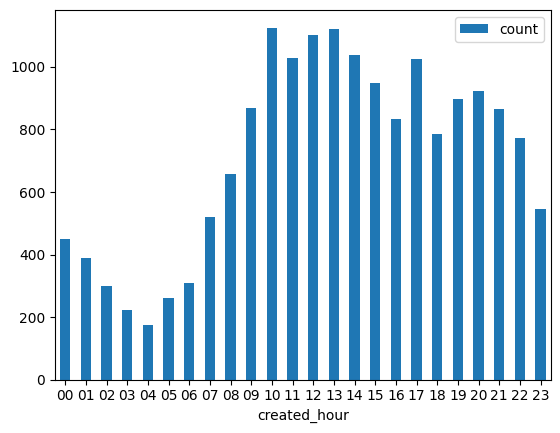

In [140]:
g.plot.bar(x='created_hour', y='count', rot=0)

<AxesSubplot:xlabel='created_hour'>

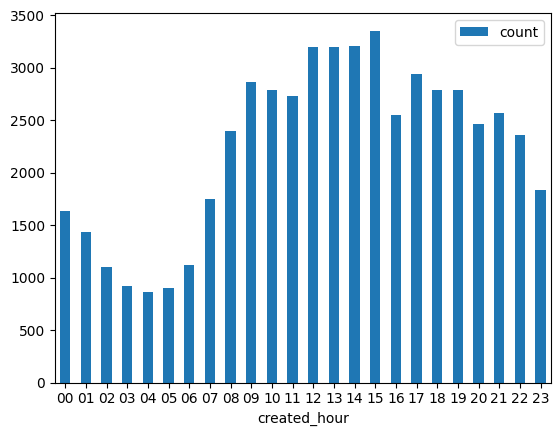

In [141]:
# 2022
g = df_2022_elapsed_all.groupby('created_hour').size().reset_index(name='count')
g['pct'] = g['count']/g['count'].sum()
g.plot.bar(x='created_hour', y='count', rot=0)

<AxesSubplot:xlabel='closed_hour'>

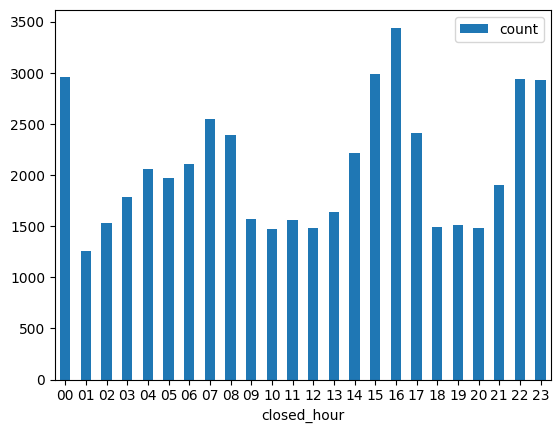

In [142]:
# 2022
g = df_2022_elapsed_all.groupby('closed_hour').size().reset_index(name='count')
g['pct'] = g['count']/g['count'].sum()
g.plot.bar(x='closed_hour', y='count', rot=0)

<AxesSubplot:xlabel='created_hour'>

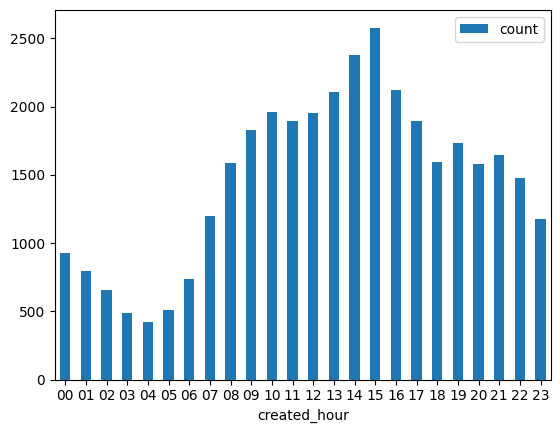

In [143]:
# 2020
g = df_2020_elapsed_all.groupby('created_hour').size().reset_index(name='count')
g['pct'] = g['count']/g['count'].sum()
g.plot.bar(x='created_hour', y='count', rot=0)

<AxesSubplot:xlabel='closed_hour'>

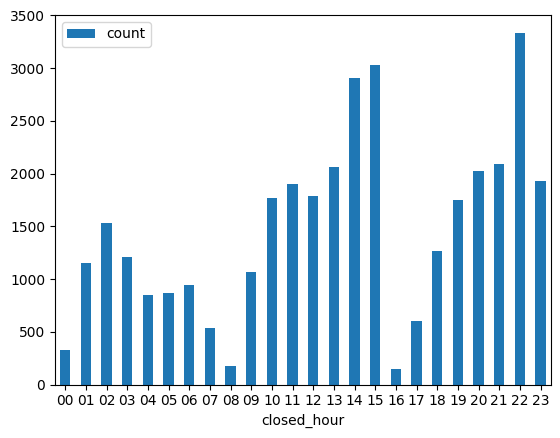

In [144]:
# 2020
g = df_2020_elapsed_all.groupby('closed_hour').size().reset_index(name='count')
g['pct'] = g['count']/g['count'].sum()
g.plot.bar(x='closed_hour', y='count', rot=0)

<AxesSubplot:xlabel='created_hour'>

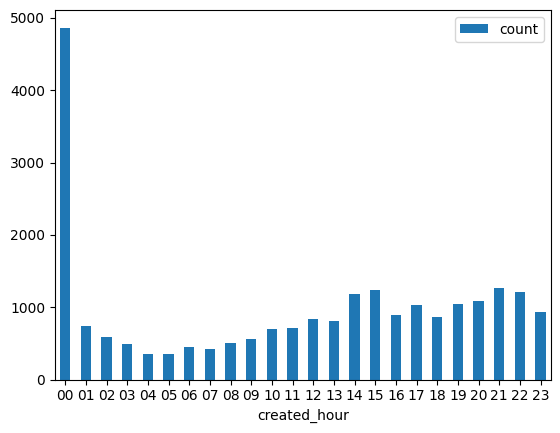

In [145]:
# 2019
g = df_2019_elapsed_all.groupby('created_hour').size().reset_index(name='count')
g['pct'] = g['count']/g['count'].sum()
g.plot.bar(x='created_hour', y='count', rot=0)

<AxesSubplot:xlabel='closed_hour'>

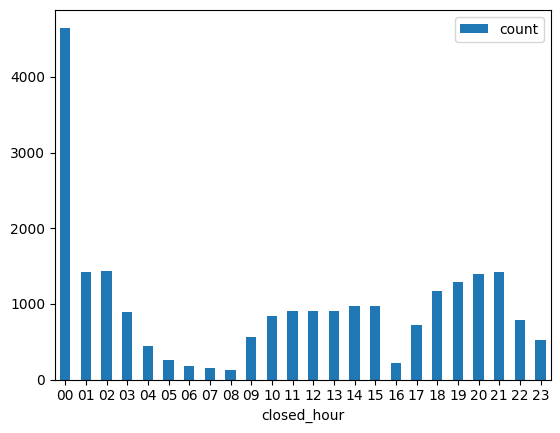

In [146]:
# 2019
g = df_2019_elapsed_all.groupby('closed_hour').size().reset_index(name='count')
g['pct'] = g['count']/g['count'].sum()
g.plot.bar(x='closed_hour', y='count', rot=0)

## Activity outcomes by month analysis

In [ ]:
# TK

## Primo center analysis

In [ ]:
# TK

## Address analysis

In [268]:
# TK

## Exporting to CSV